# OneHotEncoder (dummy variable)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

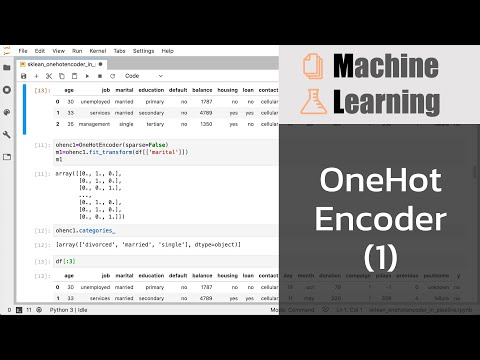

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('CHa8n7wORrU', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np

import requests
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas version:  {pd.__version__}')

pandas version:  0.25.3


In [4]:
pd.Timestamp.now()

Timestamp('2020-01-03 07:52:23.276981')

# UCI: bank marketing data set

In [5]:
r=requests.get('https://github.com/prasertcbs/basic-dataset/raw/master/bank/bank-names.txt')
print(r.text)

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/bank/bank.csv'
df=pd.read_csv(url, sep=';')
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
import sklearn
print(f'sklearn version = {sklearn.__version__}')

sklearn version = 0.21.3


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:
df['marital']

0       married
1       married
2        single
3       married
4       married
         ...   
4516    married
4517    married
4518    married
4519    married
4520     single
Name: marital, Length: 4521, dtype: object

In [11]:
df[['marital']]

,marital
0,married
1,married
2,single
3,married
4,married
...,...
4516,married
4517,married
4518,married
4519,married


In [12]:
ohenc1=OneHotEncoder(sparse=False)
m1=ohenc1.fit_transform(df[['marital']])
m1

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
ohenc1.categories_

[array(['divorced', 'married', 'single'], dtype=object)]

In [14]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [15]:
m1.shape

(4521, 3)

In [16]:
ohenc1.inverse_transform([[0, 1, 0],
                          [1, 0, 0],
                          [0, 0, 1]])

array([['married'],
       ['divorced'],
       ['single']], dtype=object)

In [17]:
ohenc2=OneHotEncoder(sparse=False, drop='first')
m2=ohenc2.fit_transform(df[['marital']])
m2

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [18]:
m2.shape

(4521, 2)

In [19]:
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
ohenc2.categories_

[array(['divorced', 'married', 'single'], dtype=object)]

In [21]:
ohenc2.inverse_transform([[0, 0],
                          [1, 0],
                          [0, 1]])

array([['divorced'],
       ['married'],
       ['single']], dtype=object)

In [22]:
ohenc=OneHotEncoder(sparse=False, drop='first')
m3=ohenc.fit_transform(df[['marital', 'default', 'education']])
m3

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [23]:
m3.shape

(4521, 6)

In [24]:
ohenc.categories_

[array(['divorced', 'married', 'single'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)]

In [25]:
ohenc.inverse_transform([
    [1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 0, 0]
])

array([['married', 'yes', 'primary'],
       ['married', 'yes', 'secondary']], dtype=object)